In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Datset

In [2]:
df = pd.read_csv('/Users/shivendragupta/Desktop/AQI_Project/AirQualityUCI.csv',delimiter=";")

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


# Feature Engineering

## Removing the unwanted columns

In [5]:
df = df.iloc[:,0:-2]

In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
df = df.replace(',', '.', regex=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Check for NA values

In [8]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

## Dropping the na values
### 1. As the number of NA values are less , dropping them

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Converting the column values  to the proper format

In [11]:
df["CO(GT)"] = df["CO(GT)"].astype("float64", errors="ignore")
df["PT08.S1(CO)"] = df["PT08.S1(CO)"].astype("int64", errors="ignore")
df["NMHC(GT)"] = df["NMHC(GT)"].astype("int64", errors="ignore")
df["C6H6(GT)"] = df["C6H6(GT)"].astype("float64", errors="ignore")
df["PT08.S2(NMHC)"] = df["PT08.S2(NMHC)"].astype("int64", errors="ignore")
df["NOx(GT)"] = df["NOx(GT)"].astype("int64", errors="ignore")
df["PT08.S3(NOx)"] = df["PT08.S3(NOx)"].astype("int64", errors="ignore")
df["NO2(GT)"] = df["NO2(GT)"].astype("int64", errors="ignore")
df["PT08.S4(NO2)"] = df["PT08.S4(NO2)"].astype("int64", errors="ignore")
df["PT08.S5(O3)"] = df["PT08.S5(O3)"].astype("int64", errors="ignore")
df["T"] = df["T"].astype("float64", errors="ignore")
df["RH"] = df["RH"].astype("float64", errors="ignore")
df["AH"] = df["AH"].astype("float64", errors="ignore")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


## Investigating the max and min values for each column

In [13]:
df_max_min = pd.concat((df.max(),df.min()),axis=1)
df_max_min

,0,1
Date,31/12/2004,01/01/2005
Time,23.00.00,00.00.00
CO(GT),11.9,-200.0
PT08.S1(CO),2040,-200
NMHC(GT),1189,-200
C6H6(GT),63.7,-200.0
PT08.S2(NMHC),2214,-200
NOx(GT),1479,-200
PT08.S3(NOx),2683,-200
NO2(GT),340,-200


In [14]:
df_numerical,df_categorical = df.iloc[:,2:],df.iloc[:,0:2]

In [15]:
df_numerical.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


## Plotting Box plots for investigating outliers

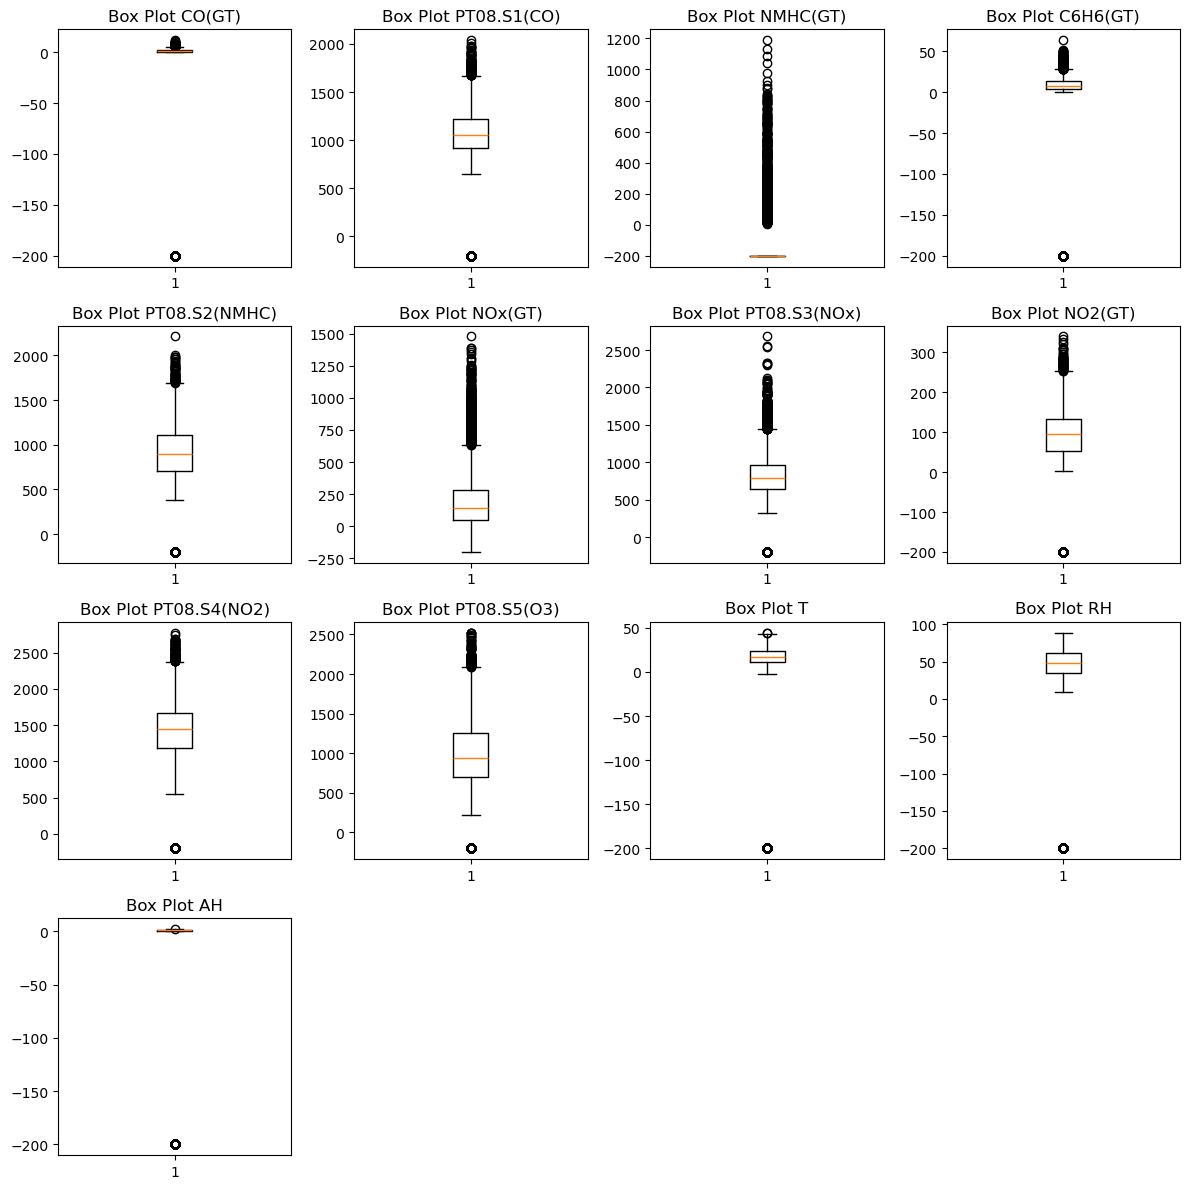

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))


axes = axes.flatten()


for i in range(len(df_numerical.columns)):
    axes[i].boxplot(df_numerical.iloc[:, i])
    axes[i].set_title(f'Box Plot '+ str(df_numerical.columns[i]))

# Hide the remaining empty subplots
for i in range(13, 16):
    axes[i].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Removing random -200 values for sensor readings

In [17]:
df_numerical['CO(GT)'] = df_numerical['CO(GT)'].replace(-200,np.nan)
df_numerical.isna().sum()

CO(GT)           1683
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

In [18]:
df['CO(GT)'] = df['CO(GT)'].replace(-200,np.nan)
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

## Removing na rows for target column 

In [19]:
df_numerical = df_numerical.dropna(subset=['CO(GT)'])

In [20]:
df = df.dropna(subset=['CO(GT)'])

In [21]:
df_numerical.shape,df.shape

((7674, 13), (7674, 15))

## Removing outliers from data with the help of 5-point summary

In [22]:
# Calculate Q1, Q3, and IQR for each column
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds (1.5 * IQR is a common threshold)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap/Floor outliers in each column
for column in df_numerical.columns:
    df_numerical[column] = np.where(df_numerical[column] > upper_bound[column], upper_bound[column], df_numerical[column])  # Cap outliers
    df_numerical[column] = np.where(df_numerical[column] < lower_bound[column], lower_bound[column], df_numerical[column])  # Floor outliers

print("DataFrame after capping/flooring outliers:")
df_numerical.head()

DataFrame after capping/flooring outliers:


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,-200.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,-200.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,-200.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,-200.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,-200.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Blox Plots of Data After removing outliers

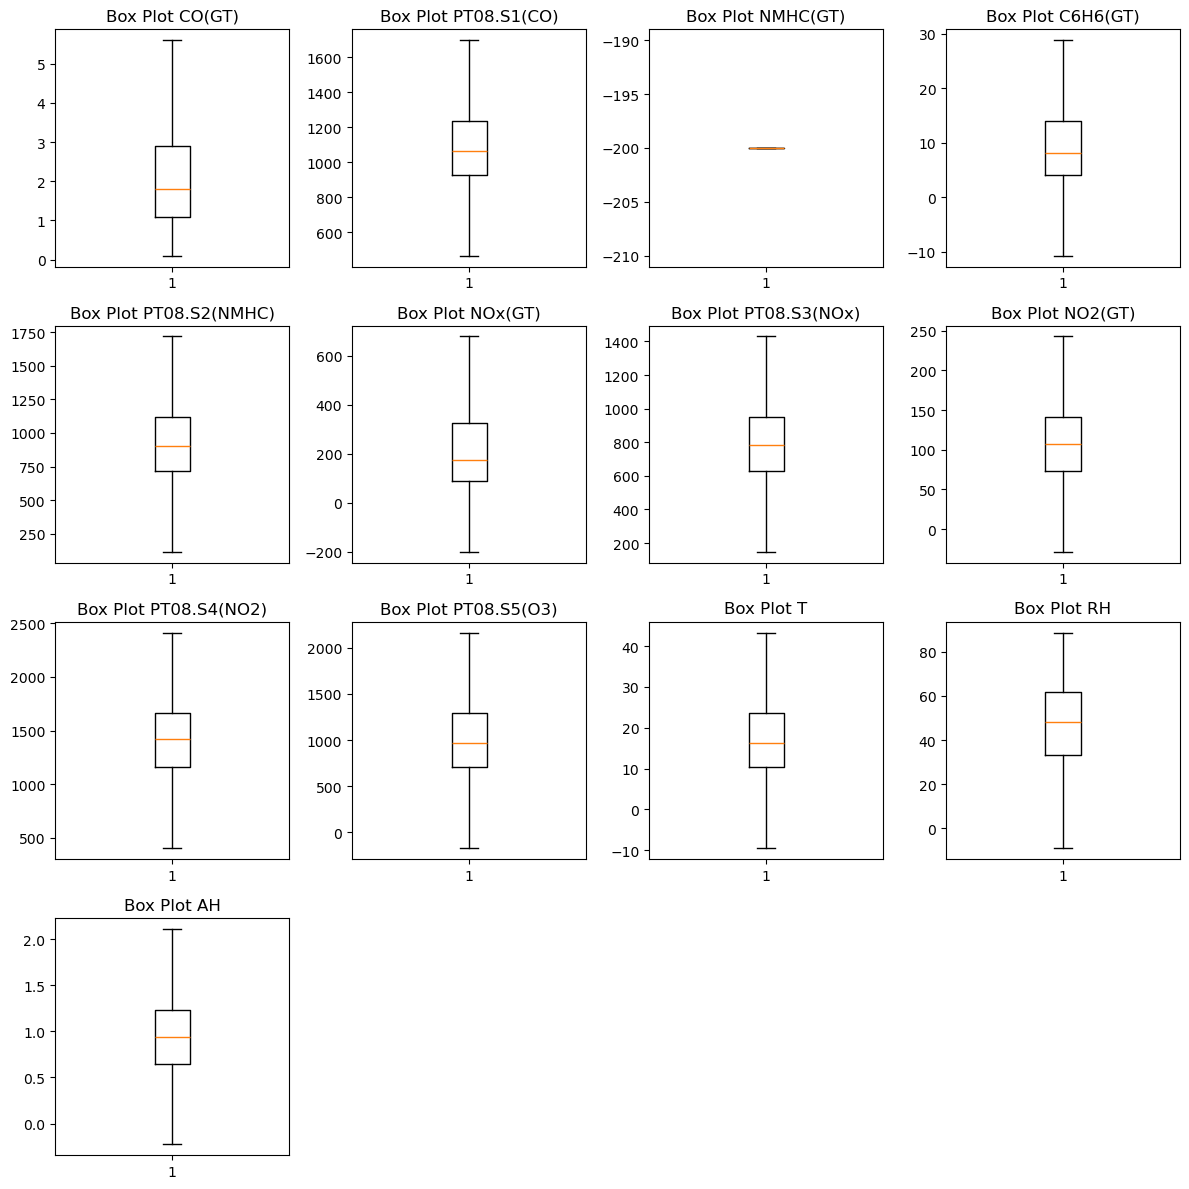

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))


axes = axes.flatten()


for i in range(len(df_numerical.columns)):
    axes[i].boxplot(df_numerical.iloc[:, i])
    axes[i].set_title(f'Box Plot '+ str(df_numerical.columns[i]))

# Hide the remaining empty subplots
for i in range(13, 16):
    axes[i].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Plotted a correlation heatmap to investigate linear realtionship between C0(GT) and other features

<Axes: >

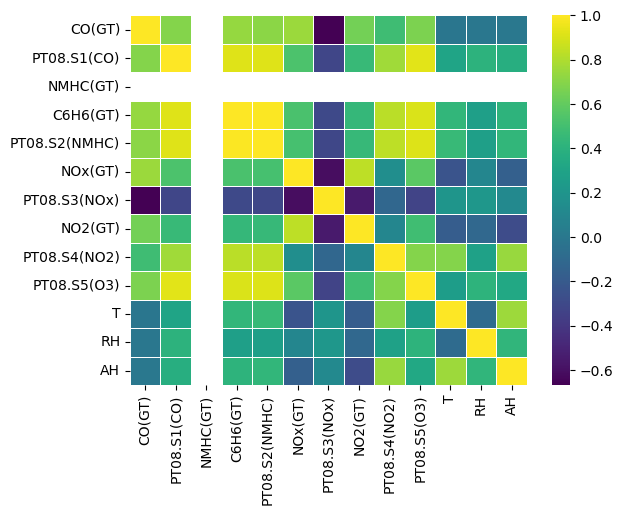

In [24]:
sns.heatmap(df_numerical.corr(), annot=None, fmt='.2f', cmap='viridis', cbar=True, vmin=None, vmax=None, linewidths=0.5, linecolor='white')

In [25]:
df_numerical.drop(columns=['NMHC(GT)'],inplace=True)

<Axes: >

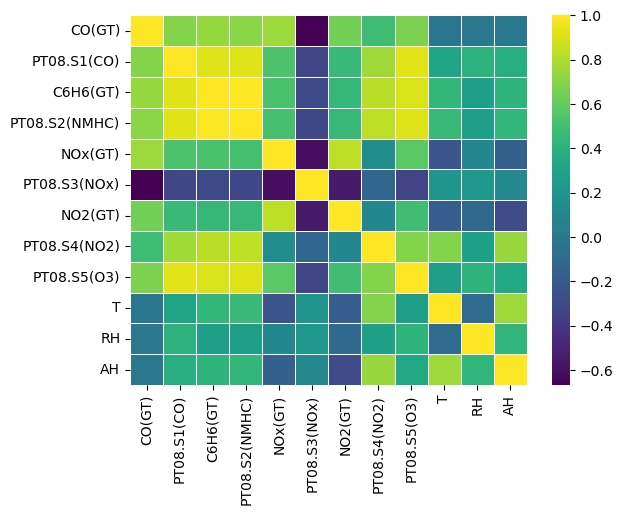

In [26]:
sns.heatmap(df_numerical.corr(), annot=None, fmt='.2f', cmap='viridis', cbar=True, vmin=None, vmax=None, linewidths=0.5, linecolor='white')

## Performing Train Test Split

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV

## Constructing new column PT08.S1(CO)_NOx(GT) for interation between PT08.S1(CO) and NOx(GT)

In [28]:
df_numerical['PT08.S1(CO)_NOx(GT)'] = df_numerical['PT08.S1(CO)'] * df_numerical['NOx(GT)']

## Constructing new column PT08.S1(CO)_C6H6(GT) for interation between PT08.S1(CO) and C6H6(GT)

In [29]:
df_numerical['PT08.S1(CO)_C6H6(GT)'] = df_numerical['PT08.S1(CO)'] * df_numerical['C6H6(GT)']

## Plotting correlation heatmap with updated new columns

<Axes: >

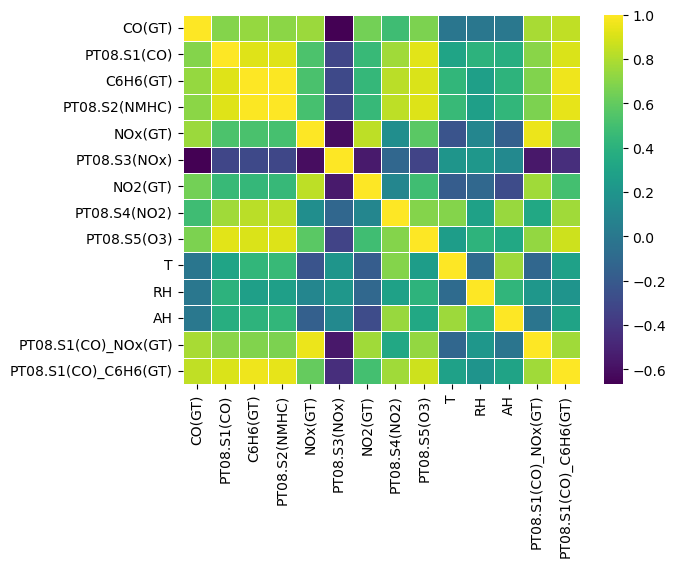

In [30]:
sns.heatmap(df_numerical.corr(), annot=None, fmt='.2f', cmap='viridis', cbar=True, vmin=None, vmax=None, linewidths=0.5, linecolor='white')

In [31]:
df_categorical = df.iloc[:,0:2]

In [32]:
df_categorical.shape,df_numerical.shape

((7674, 2), (7674, 14))

In [33]:
df_temp = pd.concat((df_categorical,df_numerical),axis=1)

# Constructing df_temp for further feature engineering tasks

In [34]:
df_temp.isna().sum()

Date                    0
Time                    0
CO(GT)                  0
PT08.S1(CO)             0
C6H6(GT)                0
PT08.S2(NMHC)           0
NOx(GT)                 0
PT08.S3(NOx)            0
NO2(GT)                 0
PT08.S4(NO2)            0
PT08.S5(O3)             0
T                       0
RH                      0
AH                      0
PT08.S1(CO)_NOx(GT)     0
PT08.S1(CO)_C6H6(GT)    0
dtype: int64

In [35]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'],format = '%d/%m/%Y')

In [36]:
df_temp.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT)
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,225760.0,16184.0
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,133076.0,12144.8
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,183662.0,12618.0
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,236672.0,12659.2
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,166632.0,8268.0


In [37]:
df_temp['month'] = df_temp['Date'].dt.month

## Constructing a season column
### The seasons can sometime affect the pollutant levels 

In [38]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df_temp['season'] = df_temp['month'].apply(get_season)

In [39]:
df_temp.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT),month,season
2139,2004-06-07,21.00.00,2.0,1004.0,10.9,1011.0,108.0,867.0,116.0,1754.0,893.0,24.6,41.9,1.2752,108432.0,10943.6,6,Summer
9070,2005-03-23,16.00.00,2.2,1216.0,12.0,1050.0,361.0,564.0,149.0,1311.0,1244.0,23.3,23.8,0.6738,438976.0,14592.0,3,Spring
8642,2005-03-05,20.00.00,2.6,1212.0,10.9,1010.0,380.0,622.0,185.0,1284.0,1214.0,7.8,63.4,0.6735,460560.0,13210.8,3,Spring
1243,2004-05-01,13.00.00,1.3,962.0,6.1,816.0,65.0,1044.0,66.0,1489.0,628.0,25.6,31.5,1.0184,62530.0,5868.2,5,Spring
262,2004-03-21,16.00.00,1.9,1208.0,6.9,853.0,98.0,1060.0,89.0,1506.0,647.0,20.3,38.0,0.8942,118384.0,8335.2,3,Spring


In [40]:
df_temp['Time'] = df_temp['Time'].str.replace('.',':',regex=False)

In [41]:
df_temp['time_of_day'] = pd.to_datetime(df_temp['Time'], format='%H:%M:%S')

In [42]:
df_temp.sample(3)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT),month,season,time_of_day
4082,2004-08-27,20:00:00,2.4,465.0,-10.75,114.875,147.0,146.5,124.0,404.0,-170.5,-9.5,-8.95,-0.2278,68355.0,-4998.75,8,Summer,1900-01-01 20:00:00
9264,2005-03-31,18:00:00,2.1,1084.0,7.20,866.000,204.0,682.0,124.0,1219.0,778.0,20.0,38.90,0.8974,221136.0,7804.80,3,Spring,1900-01-01 18:00:00
7600,2005-01-21,10:00:00,4.3,1427.0,19.40,1280.000,680.0,500.0,175.0,1481.0,1948.0,8.3,58.50,0.6403,970360.0,27683.80,1,Winter,1900-01-01 10:00:00


## Constructing a new cloumn time_of_day as Morning , Afternoon , Evening , Night

### Different times of day may have different traffic levels . Traffic levels can greatly effect pollutant level

In [43]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
df_temp['hour_of_day'] = df_temp['time_of_day'].dt.hour  
df_temp['time_of_day_cat'] = df_temp['hour_of_day'].apply(get_time_of_day)  # Assign category


In [44]:
df_temp.sample(3)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT),month,season,time_of_day,hour_of_day,time_of_day_cat
5465,2004-10-24,11:00:00,1.6,1085.0,8.4,918.0,179.0,721.0,72.0,1467.0,...,24.6,50.4,1.5363,194215.0,9114.0,10,Fall,1900-01-01 11:00:00,11,Morning
26,2004-03-11,20:00:00,5.6,1640.0,24.0,1404.0,351.0,743.0,165.0,2191.0,...,9.6,67.8,0.8133,575640.0,39360.0,3,Spring,1900-01-01 20:00:00,20,Evening
8731,2005-03-09,13:00:00,2.4,1282.0,11.2,1023.0,369.0,573.0,159.0,1305.0,...,15.7,34.6,0.6147,473058.0,14358.4,3,Spring,1900-01-01 13:00:00,13,Afternoon


In [45]:
df_temp.drop(columns=['Date','Time','month','time_of_day','hour_of_day'],inplace=True)

In [46]:
df_temp.sample(3)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT),season,time_of_day_cat
8450,4.0,1197.0,13.6,1102.0,454.0,609.0,195.0,1309.0,1253.0,7.8,50.8,0.5384,543438.0,16279.2,Winter,Evening
9170,2.1,1218.0,6.3,825.0,307.0,627.0,126.0,1393.0,978.0,14.2,82.3,1.3219,373926.0,7673.4,Spring,Evening
5854,1.5,909.0,7.5,879.0,-200.0,874.0,-29.0,1083.0,847.0,13.8,40.7,0.6405,-181800.0,6817.5,Fall,Afternoon


## Performing train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(df_temp.drop(columns=['CO(GT)']),df_temp.iloc[:,0],test_size=.2,random_state=43)

In [48]:
X_train.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT),season,time_of_day_cat
367,1024.0,4.8,753.0,79.0,1131.0,91.0,1357.0,793.0,9.7,61.6,0.7425,80896.0,4915.2,Spring,Night
4821,969.0,9.6,962.0,244.0,829.0,107.0,1316.0,856.0,23.3,28.3,0.8012,236436.0,9302.4,Fall,Afternoon
8387,844.0,0.7,466.0,77.0,1261.0,68.0,894.0,478.0,4.1,76.0,0.6304,64988.0,590.8,Winter,Morning
8964,959.0,1.9,578.0,115.0,907.0,79.0,1079.0,546.0,11.8,67.1,0.9274,110285.0,1822.1,Spring,Morning
6040,1241.0,14.6,1135.0,600.0,622.0,213.0,1280.0,1474.0,11.4,45.4,0.6113,744600.0,18118.6,Fall,Morning


## Performing Ordinal encoding on the categorical columns

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['season', 'time_of_day_cat'], dtype='object')

In [51]:
ordinal_encoder = OrdinalEncoder(categories=[['Winter', 'Spring', 'Summer', 'Fall'],  
                                             ['Morning', 'Afternoon', 'Evening', 'Night']])  
X_train[['season','time_of_day_cat']] = ordinal_encoder.fit_transform(X_train[categorical_cols])

In [52]:
X_test[['season','time_of_day_cat']] = ordinal_encoder.transform(X_test[categorical_cols])

In [53]:
X_train.sample(4)

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,PT08.S1(CO)_NOx(GT),PT08.S1(CO)_C6H6(GT),season,time_of_day_cat
9323,811.0,1.0,494.0,60.0,1118.0,46.0,872.0,470.0,9.6,51.0,0.6082,48660.0,811.0,1.0,0.0
3090,1019.0,8.3,913.0,78.0,840.0,94.0,1428.0,759.0,36.9,17.2,1.0576,79482.0,8457.7,2.0,1.0
5750,1210.0,16.3,1188.0,305.0,583.0,75.0,1575.0,1129.0,16.2,70.1,1.2837,369050.0,19723.0,3.0,0.0
74,1611.0,19.2,1274.0,279.0,754.0,161.0,1915.0,1697.0,15.7,44.1,0.7786,449469.0,30931.2,1.0,2.0


# Fitting a linear regression model

In [58]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
from sklearn.metrics import r2_score

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
train_r2_score = r2_score(y_train,lr.predict(X_train))
test_r2_score = r2_score(y_test,lr.predict(X_test))

print("Train r2_score is: " + str(train_r2_score))
print("Test r2_score is: " + str(test_r2_score))

Train r2_score is: 0.8897930568286733
Test r2_score is: 0.8928599242397163


# Fitting a Random Forest Regressor model

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf = RandomForestRegressor(n_estimators=1000,oob_score=True,max_samples=.5)

In [68]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_samples=0.5, n_estimators=1000, oob_score=True)

In [69]:
print("Train r2_score is: " + str(r2_score(y_train,rf.predict(X_train))))
print("Test r2_score is: " + str(r2_score(y_test,rf.predict(X_test))))
print("Oob Score is: " + str(rf.oob_score_))

Train r2_score is: 0.9717013141006248
Test r2_score is: 0.9259672837284636
Oob Score is: 0.9238438699531566


In [70]:
rf.feature_importances_

array([0.00854556, 0.00459912, 0.01087881, 0.09685023, 0.02272698,
       0.04456967, 0.00631578, 0.00709293, 0.00943342, 0.00612172,
       0.00782342, 0.0144061 , 0.75125445, 0.00358459, 0.00579721])

# Performing Grid Search CV for Hyper Parameter Tuning

In [77]:
param_grid = {
    'n_estimators': [50, 100, 200,500,1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}


In [78]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_samples=0.5, n_estimators=1000,
                                             oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             scoring='neg_root_mean_squared_error')

In [80]:
best_model = grid_search.best_estimator_

In [126]:
test_r2 = r2_score(y_test,best_model.predict(X_test))
train_r2 = r2_score(y_train,best_model.predict(X_train))
print("Train r2_score is: " + str(train_r2))
print("Test r2_score is: " + str(test_r2))

Train r2_score is: 0.9719894802605241
Test r2_score is: 0.9254125199732054


In [119]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


# Fitting Gradient Boosting Regressor

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
gb = GradientBoostingRegressor(n_estimators=1000,max_depth=4)

In [84]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=1000)

In [128]:
print("Train r2_score is: " + str(r2_score(y_train,gb.predict(X_train))))
print("Test r2_score is: " + str(r2_score(y_test,gb.predict(X_test))))


Train r2_score is: 0.9914885139106006
Test r2_score is: 0.9332824523152341


# Fitting XGBOOST

In [89]:
import xgboost as xgb

In [104]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for regression
params = {
    'objective': 'reg:squarederror',  
    'max_depth': 3,  
    'eta': 0.1,  
    'subsample': 0.7, 
    'colsample_bytree': 0.8, 
    'seed': 42 
}

# Train the model
num_rounds = 1000  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)

In [129]:
from sklearn.metrics import r2_score
# Evaluate the model
r2_score_ = r2_score(y_test, y_pred)
print("Train r2_score is: " + str(r2_score(y_train,model.predict(dtrain))))
print("Test r2_score is: " + str(r2_score(y_test,y_pred)))



Train r2_score is: 0.9749652568283947
Test r2_score is: 0.9334154044335201
